## Steam Games Recommender System -- EDA

The first part of building the recommender system is creating the DataFrame

First, I import the necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Create a dataframe containing a list of the games on Steam, called `details_df`. The data was scraped off of the Steam Games app.

In [2]:
details_df = pd.read_csv("data/steam_games.csv", sep=";")

details_df.head()

C:\Users\sjkie\AppData\Local\Temp\ipykernel_7388\424083148.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  details_df = pd.read_csv("data/steam_games.csv", sep=";")


,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [3]:
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

In [4]:

genres = details_df['Genre'].astype(str).str.split(',').apply(lambda x: [i.strip() for i in x]).str.join('|').str.get_dummies()
genres = genres.drop(['nan'], axis=1)
genres.head()

,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,...,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


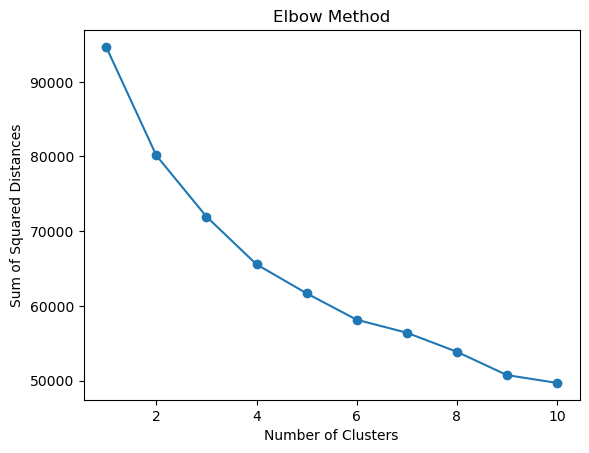

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Separate features
X = genres

# Calculate sum of squared distances for different number of clusters
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot the sum of squared distances for different number of clusters
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


In [5]:
import pandas as pd
from sklearn.cluster import KMeans


# Separate features
X = genres

# Initialize clustering object
kmeans = KMeans(n_clusters=10)

# Fit and predict clusters
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataframe
genres['cluster'] = clusters

# Display the first 5 rows of the data with cluster labels
print(genres.head())


   Accounting  Action  Adventure  Animation & Modeling  Audio Production  \
0           0       1          0                     0                 0   
1           0       1          1                     0                 0   
2           0       0          1                     0                 0   
3           0       1          0                     0                 0   
4           0       1          0                     0                 0   

   Casual  Design & Illustration  Early Access  Education  Free to Play  ...  \
0       0                      0             0          0             0  ...   
1       0                      0             0          0             0  ...   
2       0                      0             0          0             0  ...   
3       0                      0             0          0             0  ...   
4       1                      0             0          0             0  ...   

   Sexual Content  Simulation  Software Training  Sports  Stra

In [6]:
# Split the 'Tags' column by commas
tags = details_df['Tags'].str.split(', ')

# Create an empty dictionary to store the tag values
tag_values = {}

# Iterate over the tags and extract the tag names and values
for i, row in enumerate(tags):
    row_tag_values = {}
    for tag in row:
        name, value = tag.split(': ')
        row_tag_values[name] = int(value)
    total_tags = sum(row_tag_values.values())
    if total_tags != 0:
        for tag, value in row_tag_values.items():
            row_tag_values[tag] = value / total_tags
    else:
        for tag, value in row_tag_values.items():
            row_tag_values[tag] = np.nan
    tag_values[i] = row_tag_values

# Create a new DataFrame from the tag values dictionary
result = pd.DataFrame.from_dict(tag_values, orient='index').fillna(0)

# Add the 'tag_' prefix to each tag column
result = result.add_prefix('tag_')


TypeError: 'float' object is not iterable

The `details_df` dataframe contains destriptive details of 55,691 games on Steam. These details can be vectorized for NLP. The details will be used in the more sophisitcated models.

Create a dataframe containing a list of the games on Steam, called `games_df`. This is the first part of a bundle of dataframes by Kozyriev on Kaggle. The data was scraped off of the Steam Games app.

In [4]:
games_df = pd.read_csv("data/KOZYRIEV/games.csv")

games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


In [5]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46068 entries, 0 to 46067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          46068 non-null  int64  
 1   title           46068 non-null  object 
 2   date_release    46068 non-null  object 
 3   win             46068 non-null  bool   
 4   mac             46068 non-null  bool   
 5   linux           46068 non-null  bool   
 6   rating          46068 non-null  object 
 7   positive_ratio  46068 non-null  int64  
 8   user_reviews    46068 non-null  int64  
 9   price_final     46068 non-null  float64
 10  price_original  46068 non-null  float64
 11  discount        46068 non-null  float64
 12  steam_deck      46068 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.3+ MB


This dataframe contains statistics for each game such as price, overal rating and numner of reviews.

Create a dataframe containing individual users review details regarding individual games, called `recs_df`. This is the second part of a bundle of dataframes by Kozyriev on Kaggle. The data was scraped off of the Steam Games app.

In [6]:
recs_df = pd.read_csv("data/KOZYRIEV/recommendations.csv")

recs_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,19954,0
1,304390,4,0,2017-02-17,False,11.5,1098,1
2,1085660,2,0,2019-11-17,True,336.5,91207,2
3,703080,0,0,2022-09-23,True,27.4,93054,3
4,526870,0,0,2021-01-10,True,7.9,9106,4


In [7]:
recs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072270 entries, 0 to 10072269
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 547.5+ MB


This dataframe contains the users recommendation for each game (Boolian) and sstatistics related to the review, such as its review_id on Steam Games, the date posted, and if people liked it. 

The number of unique games in the dataset.

In [8]:
recs_df['app_id'].nunique()

713

Create a dataframe containing details about the users on Steam, called `users_df`. This is the third part of a bundle of dataframes by Kozyriev on Kaggle. The data was scraped off of the Steam Games app.

In [9]:
users_df = pd.read_csv("data/KOZYRIEV/users.csv")

users_df.head()

,user_id,products,reviews
0,5693478,156,1
1,3595958,329,3
2,1957593,176,2
3,2108293,98,2
4,2329878,144,2


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810794 entries, 0 to 5810793
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 133.0 MB


This dataframe has the number of games owned by the users and the number of reviews they posted.

I merged the `games_df` and `recs_df` based on the `app_id`. The resulting dataframe is called `joined_df`.

In [11]:
joined_df = pd.merge(games_df, recs_df,on="app_id")
joined_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,0,0,2016-01-09,True,192.5,5015359,9124149
1,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,60,2,2021-06-26,False,11.6,1163355,9124153
2,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,0,0,2020-03-06,True,57.4,4495083,9124154
3,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,2,0,2021-02-11,True,654.2,548844,9124155
4,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True,0,0,2020-07-04,True,13.4,708548,9124156


I merged the resulting `joined_df` and `users_df` based on the `user_id`. The resulting dataframe is called `joined_df2`.

In [12]:
# Join df2 and df3 on the 'app_id' column
joined_df2 = pd.merge(joined_df, users_df, on="user_id")
joined_df2.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id,products,reviews
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,True,0,0,2016-01-09,True,192.5,5015359,9124149,88,2
1,238960,Path of Exile,2013-10-23,True,True,False,Very Positive,87,196492,0.00,...,True,0,0,2017-12-23,True,46.7,5015359,1567818,88,2
2,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,True,60,2,2021-06-26,False,11.6,1163355,9124153,66,1
3,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,True,0,0,2020-03-06,True,57.4,4495083,9124154,297,3
4,311210,Call of Duty®: Black Ops III,2015-11-05,True,True,False,Very Positive,85,91674,59.99,...,True,2,0,2020-04-14,True,108.4,4495083,851611,297,3


In [13]:
joined_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10072270 entries, 0 to 10072269
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   title           object 
 2   date_release    object 
 3   win             bool   
 4   mac             bool   
 5   linux           bool   
 6   rating          object 
 7   positive_ratio  int64  
 8   user_reviews    int64  
 9   price_final     float64
 10  price_original  float64
 11  discount        float64
 12  steam_deck      bool   
 13  helpful         int64  
 14  funny           int64  
 15  date            object 
 16  is_recommended  bool   
 17  hours           float64
 18  user_id         int64  
 19  review_id       int64  
 20  products        int64  
 21  reviews         int64  
dtypes: bool(5), float64(4), int64(9), object(4)
memory usage: 1.4+ GB


I merged the resulting `joined_df2` and `details_df` usinf  `app_id` and `App ID` as keys. The dataframe is called `final_df`.

In [14]:
final_df = pd.merge(joined_df2, details_df, left_on='app_id', right_on='App ID')
final_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,1999,1999,0,522,"English, French, Italian, German, Spanish - Spain",windows,2008/11/18,0,http://www.callofduty.com,https://cdn.akamai.steamstatic.com/steam/apps/...
1,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,1999,1999,0,522,"English, French, Italian, German, Spanish - Spain",windows,2008/11/18,0,http://www.callofduty.com,https://cdn.akamai.steamstatic.com/steam/apps/...
2,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,1999,1999,0,522,"English, French, Italian, German, Spanish - Spain",windows,2008/11/18,0,http://www.callofduty.com,https://cdn.akamai.steamstatic.com/steam/apps/...
3,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,1999,1999,0,522,"English, French, Italian, German, Spanish - Spain",windows,2008/11/18,0,http://www.callofduty.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,...,1999,1999,0,522,"English, French, Italian, German, Spanish - Spain",windows,2008/11/18,0,http://www.callofduty.com,https://cdn.akamai.steamstatic.com/steam/apps/...


I check the shape of the `final_df` dataframe and find it is nearly 10 million rows and 44 columns. 

In [15]:
final_df.shape

(9846638, 44)

The dataframe takes up more than 3 GB. It needs to be drastically reduced to be managable for modelling.

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9846638 entries, 0 to 9846637
Data columns (total 44 columns):
 #   Column             Dtype  
---  ------             -----  
 0   app_id             int64  
 1   title              object 
 2   date_release       object 
 3   win                bool   
 4   mac                bool   
 5   linux              bool   
 6   rating             object 
 7   positive_ratio     int64  
 8   user_reviews       int64  
 9   price_final        float64
 10  price_original     float64
 11  discount           float64
 12  steam_deck         bool   
 13  helpful            int64  
 14  funny              int64  
 15  date               object 
 16  is_recommended     bool   
 17  hours              float64
 18  user_id            int64  
 19  review_id          int64  
 20  products           int64  
 21  reviews            int64  
 22  App ID             int64  
 23  Name               object 
 24  Short Description  object 
 25  Developer         

First, I check for null values. There are 795,417 NaNs.

In [17]:
final_df.isna().sum().sum()

795417

This makes up ~8% of the rows.

In [18]:
(final_df.isna().sum().sum() / final_df.shape[0])*100

8.078056693056046

Although this is a relatively large proportion of the dataset, we can afford to drop them.

In [19]:
final_df = final_df.dropna()

We check to see if there are any NaNs left, and there are none.

In [20]:
final_df.isna().sum().sum()

0

Now we check for duplicate rows, and there are none.

In [21]:
# Count duplicates based on all columns
num_duplicates = final_df.duplicated().sum()
num_duplicates

0

We check the distributions of the numerical columns by plotting their histograms.

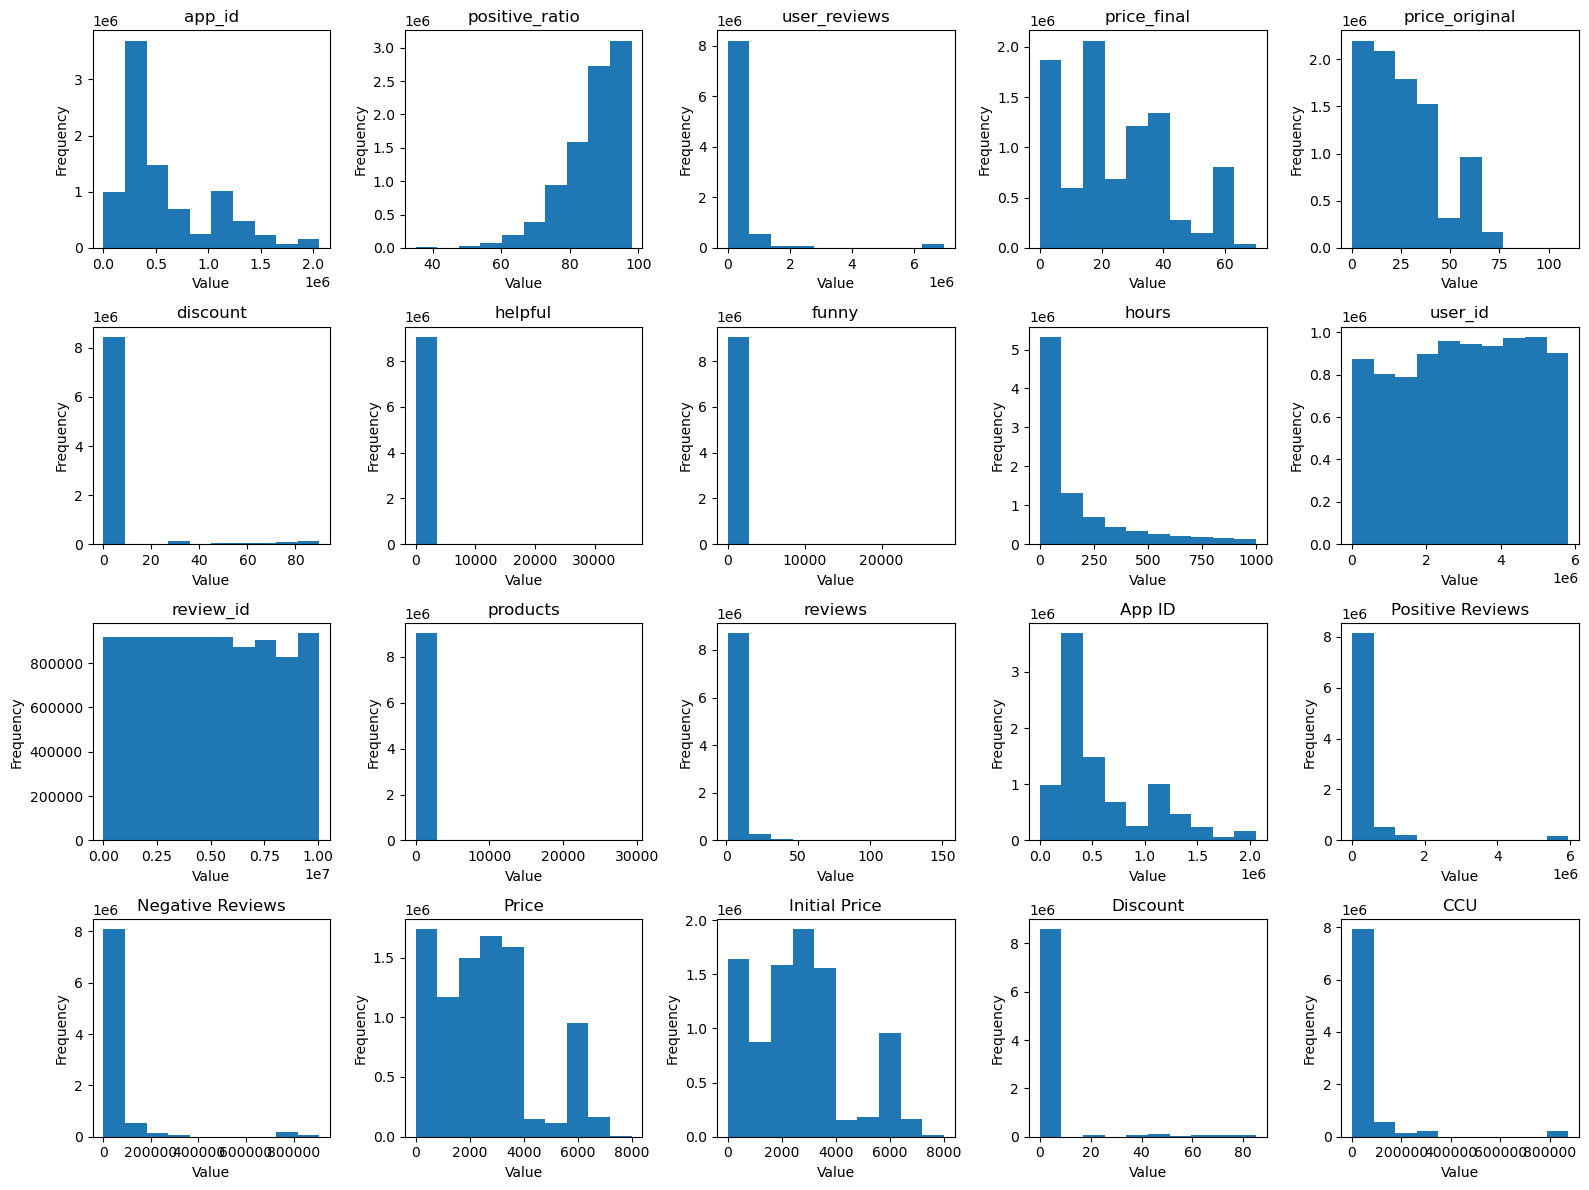

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only the numeric columns
num_cols = final_df.select_dtypes(include='number')

# Calculate the number of rows and columns required for the subplots
num_rows = (len(num_cols.columns) - 1) // 5 + 1
num_cols_subplot = min(len(num_cols.columns), 5)

# Create a new figure with a size of 16x12 inches
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(16, 12))

# Flatten the axs array for ease of use in loop
axs = axs.flatten()

# Plot the distribution of numeric columns in individual subplots
for i, col in enumerate(num_cols.columns):
    axs[i].hist(num_cols[col])
    axs[i].set_title(col)
    axs[i].set_xlabel("Value")
    axs[i].set_ylabel("Frequency")

# Hide the unused subplots
for i in range(len(num_cols.columns), num_rows*num_cols_subplot):
    axs[i].axis('off')

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Show the plot
plt.show()


- the price columns seem similarly distributed
- the ratings columns seem coorelated
- the positive_ratio column is strongly left-skewed, indicating a high proportion of positive recommendations

We check the statistics for the various prices. They have similar features.

We test the correlations between the game prices. We find high correlation. Unsuprising, since price is dupplicated in `games_df` and `details_df`. It is also a fact that the final prices are based on the original prices.

In [23]:

# Calculate the correlation matrix
corr_matrix = final_df[['price_final', 'price_original', 'Price', 'Initial Price']].corr()

# Print the correlation matrix
print(corr_matrix)

                price_final  price_original     Price  Initial Price
price_final        1.000000        0.895079  0.842918       0.871668
price_original     0.895079        1.000000  0.948791       0.973773
Price              0.842918        0.948791  1.000000       0.971819
Initial Price      0.871668        0.973773  0.971819       1.000000


The two discount amounts are not correlated.

In [24]:
# Calculate the correlation matrix
corr_matrix2 = final_df[['discount', 'Discount']].corr()

# Print the correlation matrix
print(corr_matrix2)

          discount  Discount
discount  1.000000 -0.049417
Discount -0.049417  1.000000


we check the number of unique games after dropping the NaNs and find there are now 553 unique games in the dataset.

In [25]:
final_df['app_id'].nunique()

553

We check the number of unique users in the dataset after dropping NaNs and find 5.2 million unique users.

In [26]:
final_df['user_id'].nunique()

5271151

We drop 'Price', 'Initial Price'and 'Discount' from the dataframe. We chose to drop the price columns from the details_df because they are redundant. The price details from the 'games_df' are more closely tied to the user details. We only included the details_df for the desciptive details of the games, such as Genre, short description, etc.

In [27]:
final_df = final_df.drop(columns=['Price', 'Initial Price', 'Discount'])

We drop 'App ID', 'Name'and 'Release Date' from the dataframe. We chose to drop them because they are redundant. The price details from the 'games_df' are more closely tied to the user details. We only included the details_df for the desciptive details of the games, such as Genre, short description, etc.

In [28]:
final_df = final_df.drop(columns=['App ID', 'Name', 'Release Date'])

We check the info for the final_df dataframe. It now contains 38 columns and is 2.3 GB in size. Better, but we still need to reduce it.

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051221 entries, 0 to 9846637
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   app_id             int64  
 1   title              object 
 2   date_release       object 
 3   win                bool   
 4   mac                bool   
 5   linux              bool   
 6   rating             object 
 7   positive_ratio     int64  
 8   user_reviews       int64  
 9   price_final        float64
 10  price_original     float64
 11  discount           float64
 12  steam_deck         bool   
 13  helpful            int64  
 14  funny              int64  
 15  date               object 
 16  is_recommended     bool   
 17  hours              float64
 18  user_id            int64  
 19  review_id          int64  
 20  products           int64  
 21  reviews            int64  
 22  Short Description  object 
 23  Developer          object 
 24  Publisher          object 
 25  Genre             

We again plot the histograms of the numeric columns to check their distributions.

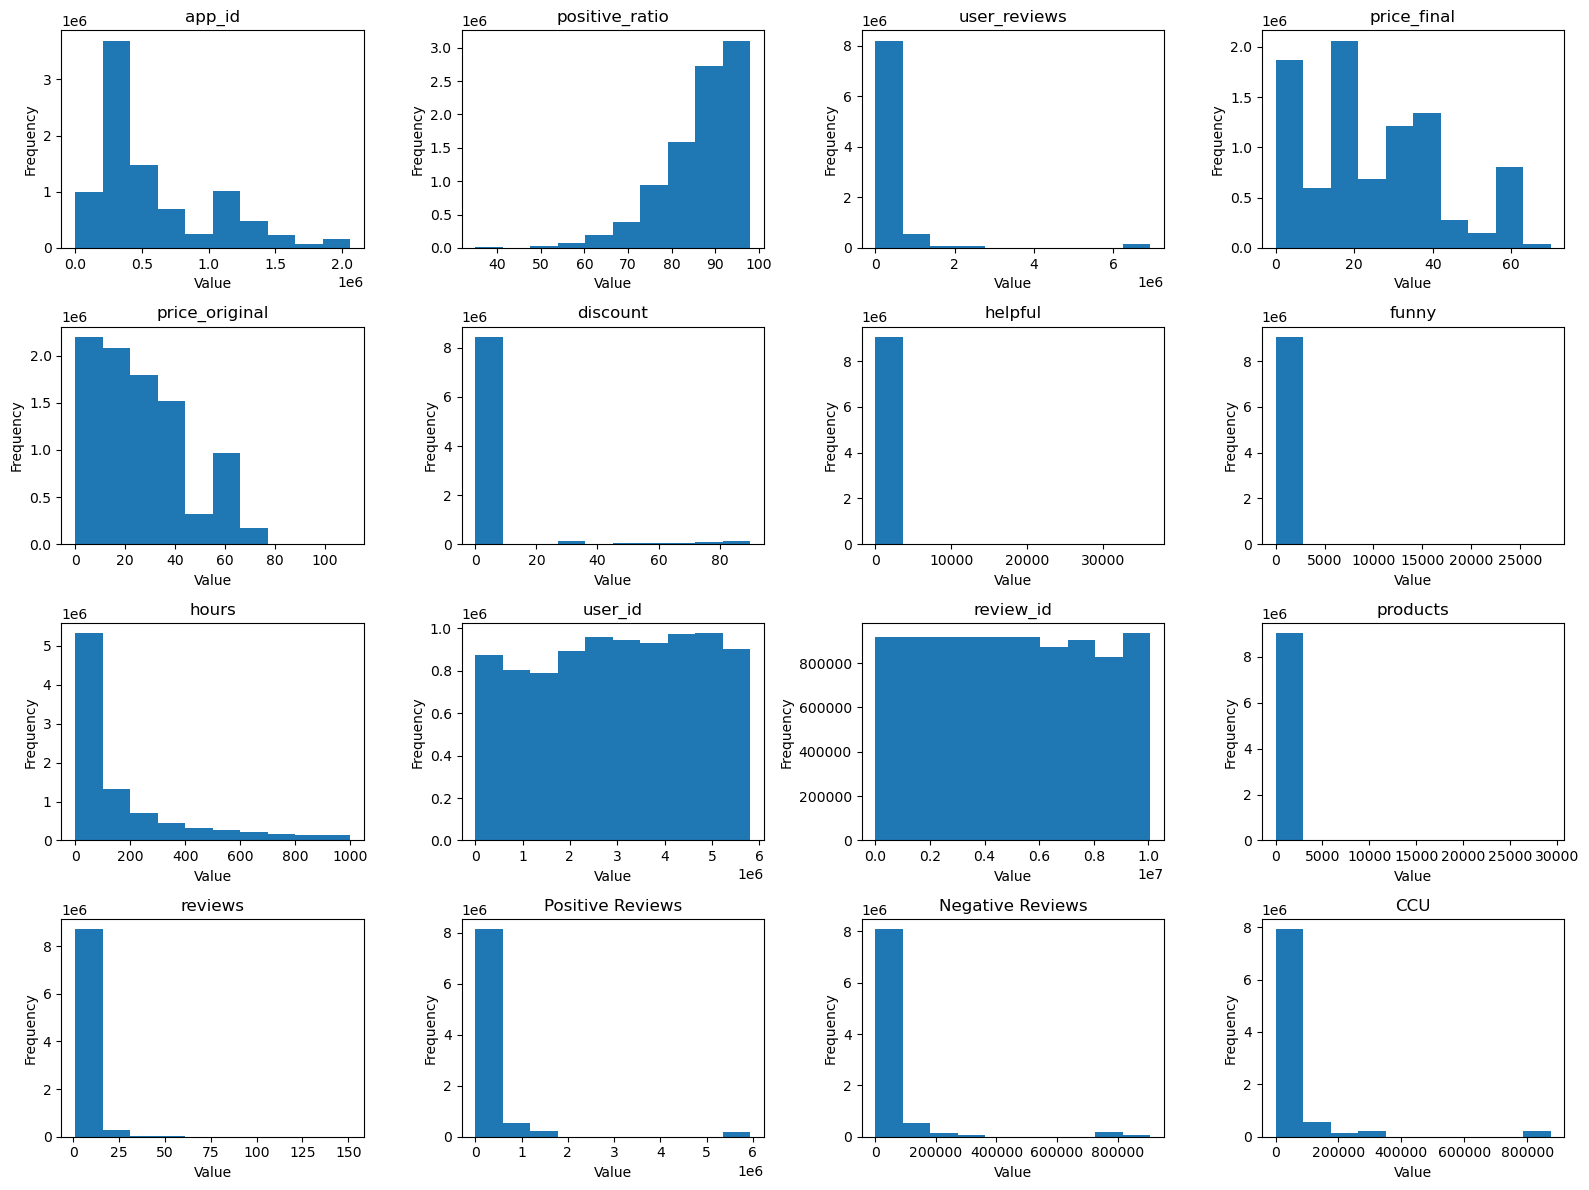

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only the numeric columns
num_cols = final_df.select_dtypes(include='number')

# Calculate the number of rows and columns required for the subplots
num_rows = (len(num_cols.columns) - 1) // 4 + 1
num_cols_subplot = min(len(num_cols.columns), 4)

# Create a new figure with a size of 16x12 inches
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(16, 12))

# Flatten the axs array for ease of use in loop
axs = axs.flatten()

# Plot the distribution of numeric columns in individual subplots
for i, col in enumerate(num_cols.columns):
    axs[i].hist(num_cols[col])
    axs[i].set_title(col)
    axs[i].set_xlabel("Value")
    axs[i].set_ylabel("Frequency")

# Hide the unused subplots
for i in range(len(num_cols.columns), num_rows*num_cols_subplot):
    axs[i].axis('off')

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Show the plot
plt.show()


We plot the heatmap of the correlations between the numeric variables.

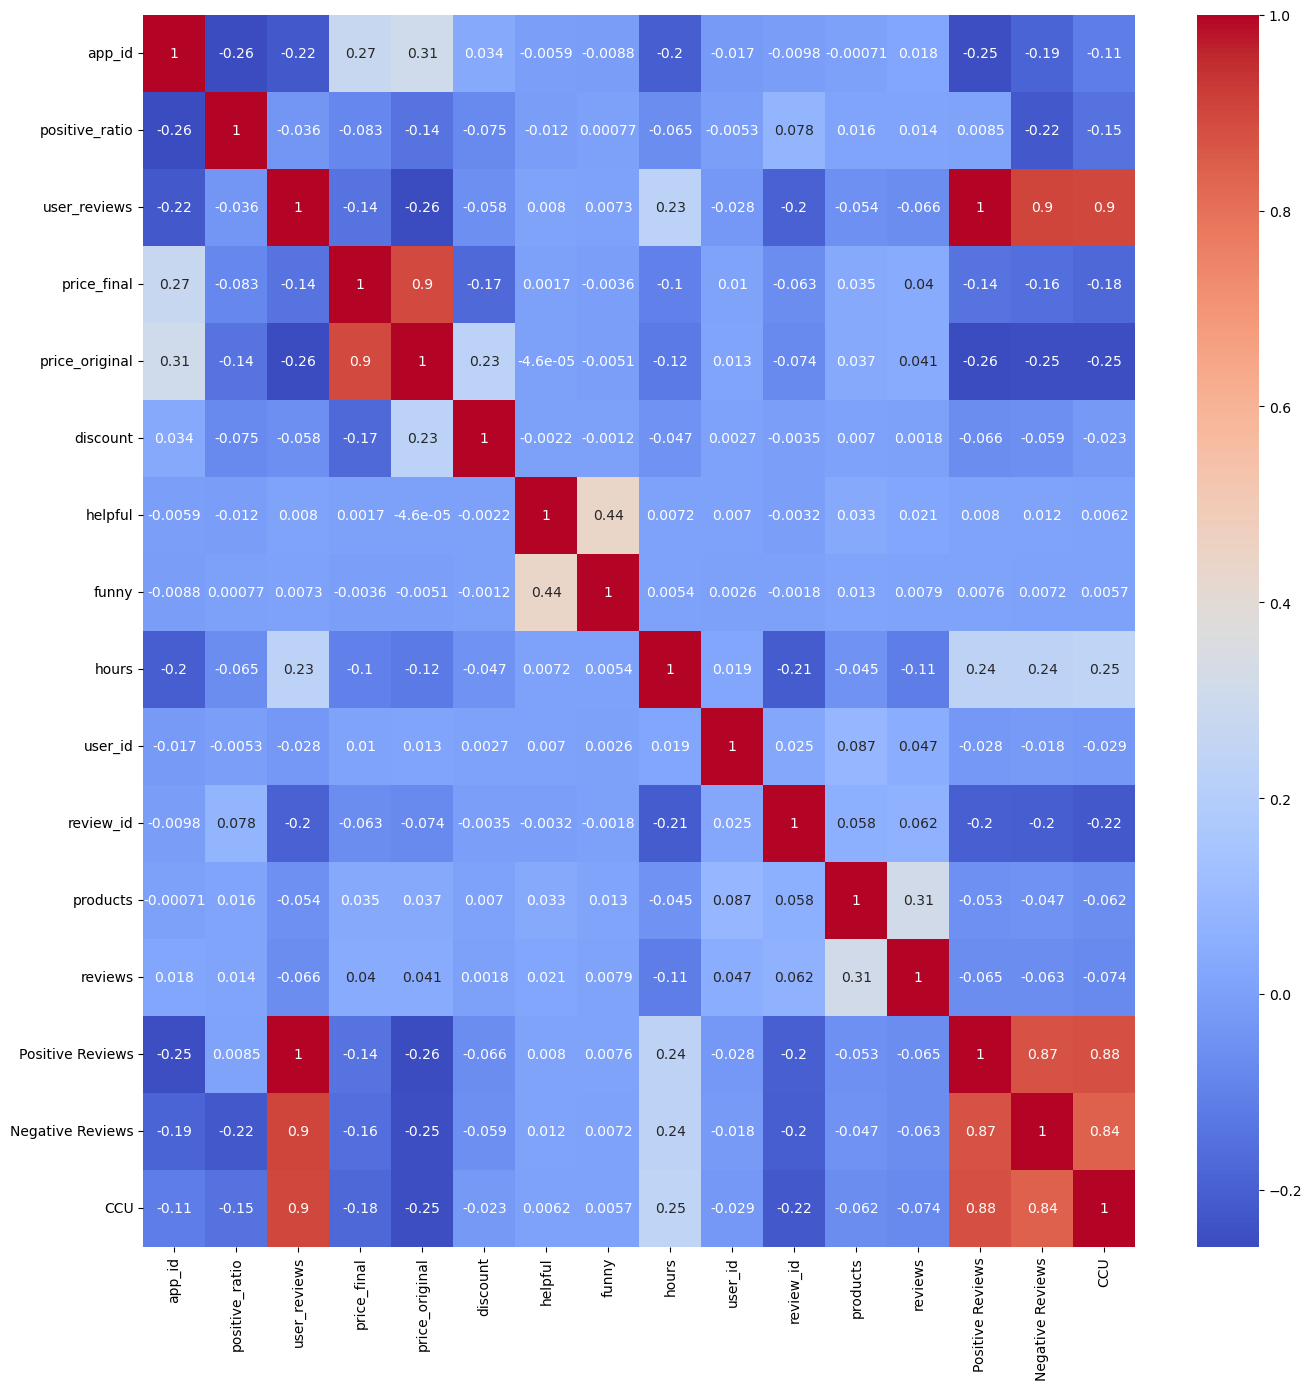

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select only numeric columns
numeric_cols = final_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Set the size of the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the correlation heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Show the plot
plt.show()


- price_original correlates with 'price_final'
- user_reviews correlates with Positive Reviews and Negative Reviews
- Positive Reviews, Negative Reviews and CCU all correlate

- We drop 'price_original' because it is redundant. We are more interested in the price acually paid by the user
- We drop 'Positive Reviews', 'Negative Reviews'and 'CCU' since those columns are redundant. The info exists in positive_ratio

In [32]:
final_df = final_df.drop(columns=['price_original', 'Positive Reviews', 'Negative Reviews', 'CCU'])

We again plot the histograms of the numeric columns to check their distributions.

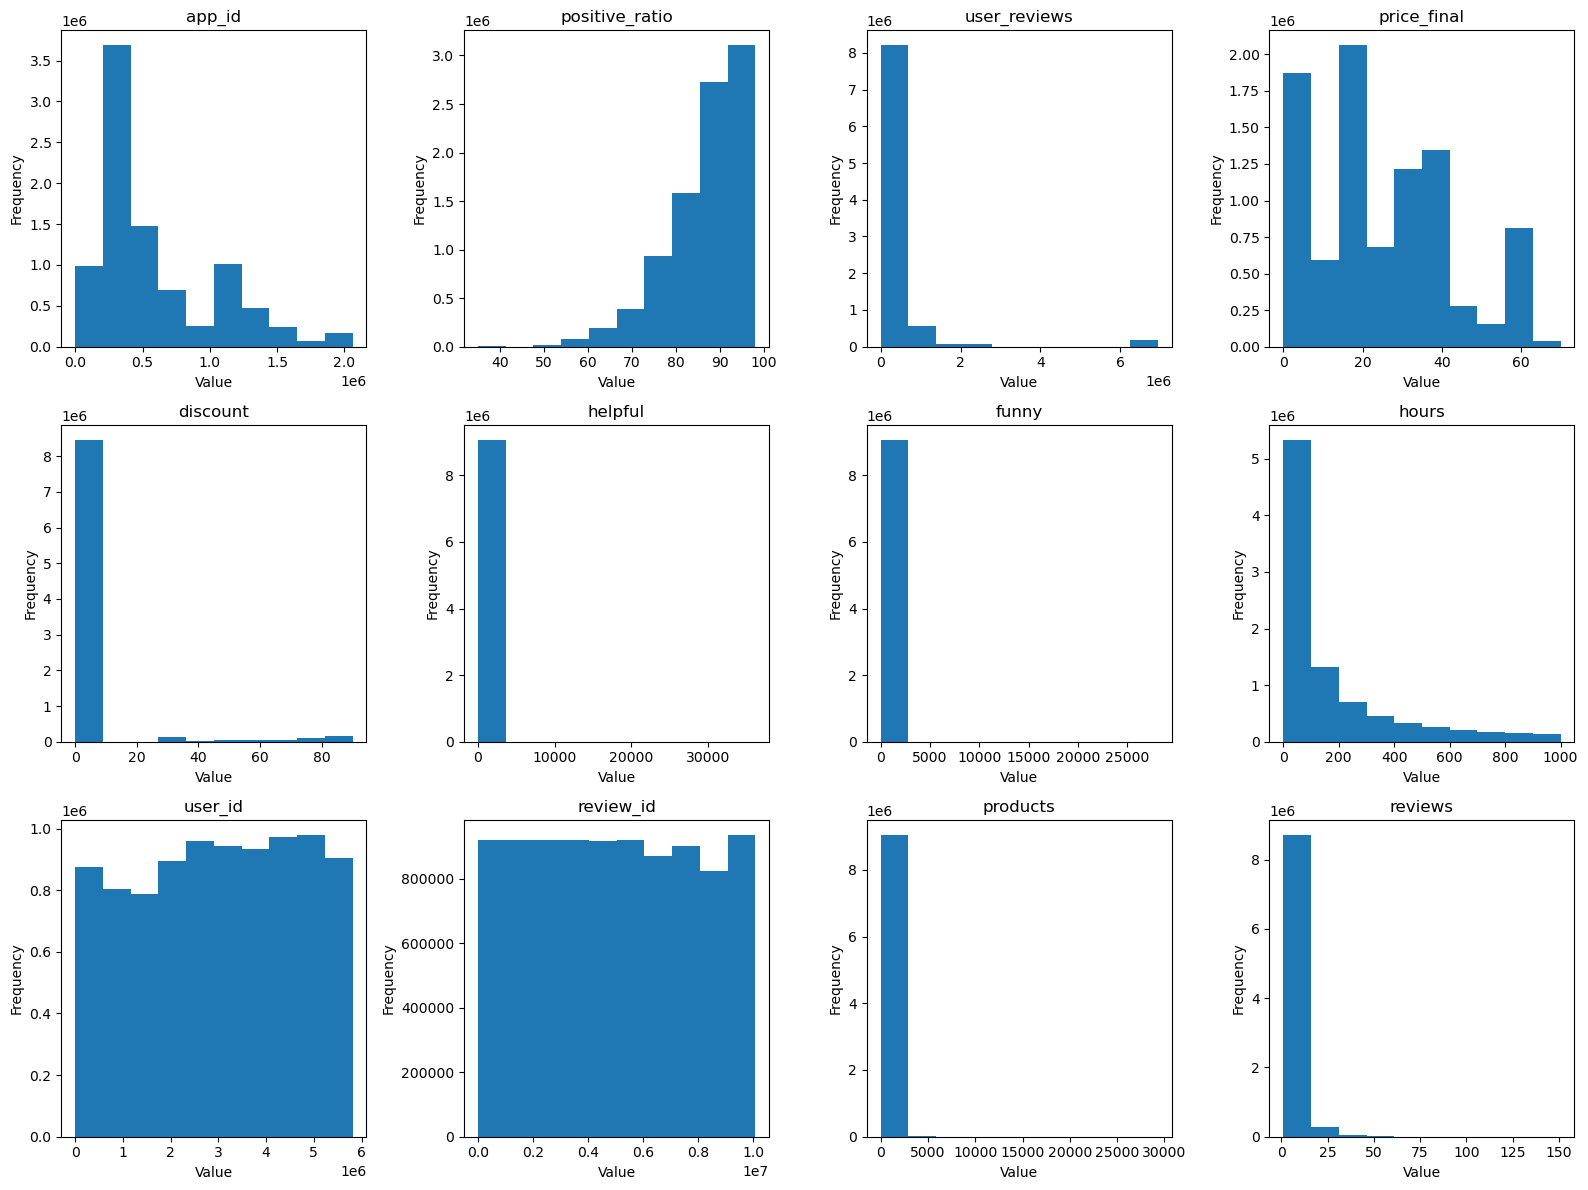

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only the numeric columns
num_cols = final_df.select_dtypes(include='number')

# Calculate the number of rows and columns required for the subplots
num_rows = (len(num_cols.columns) - 1) // 4 + 1
num_cols_subplot = min(len(num_cols.columns), 4)

# Create a new figure with a size of 16x12 inches
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(16, 12))

# Flatten the axs array for ease of use in loop
axs = axs.flatten()

# Plot the distribution of numeric columns in individual subplots
for i, col in enumerate(num_cols.columns):
    axs[i].hist(num_cols[col])
    axs[i].set_title(col)
    axs[i].set_xlabel("Value")
    axs[i].set_ylabel("Frequency")

# Hide the unused subplots
for i in range(len(num_cols.columns), num_rows*num_cols_subplot):
    axs[i].axis('off')

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()

# Show the plot
plt.show()


We again plot a heatmap of the correlations and find none that are significant.

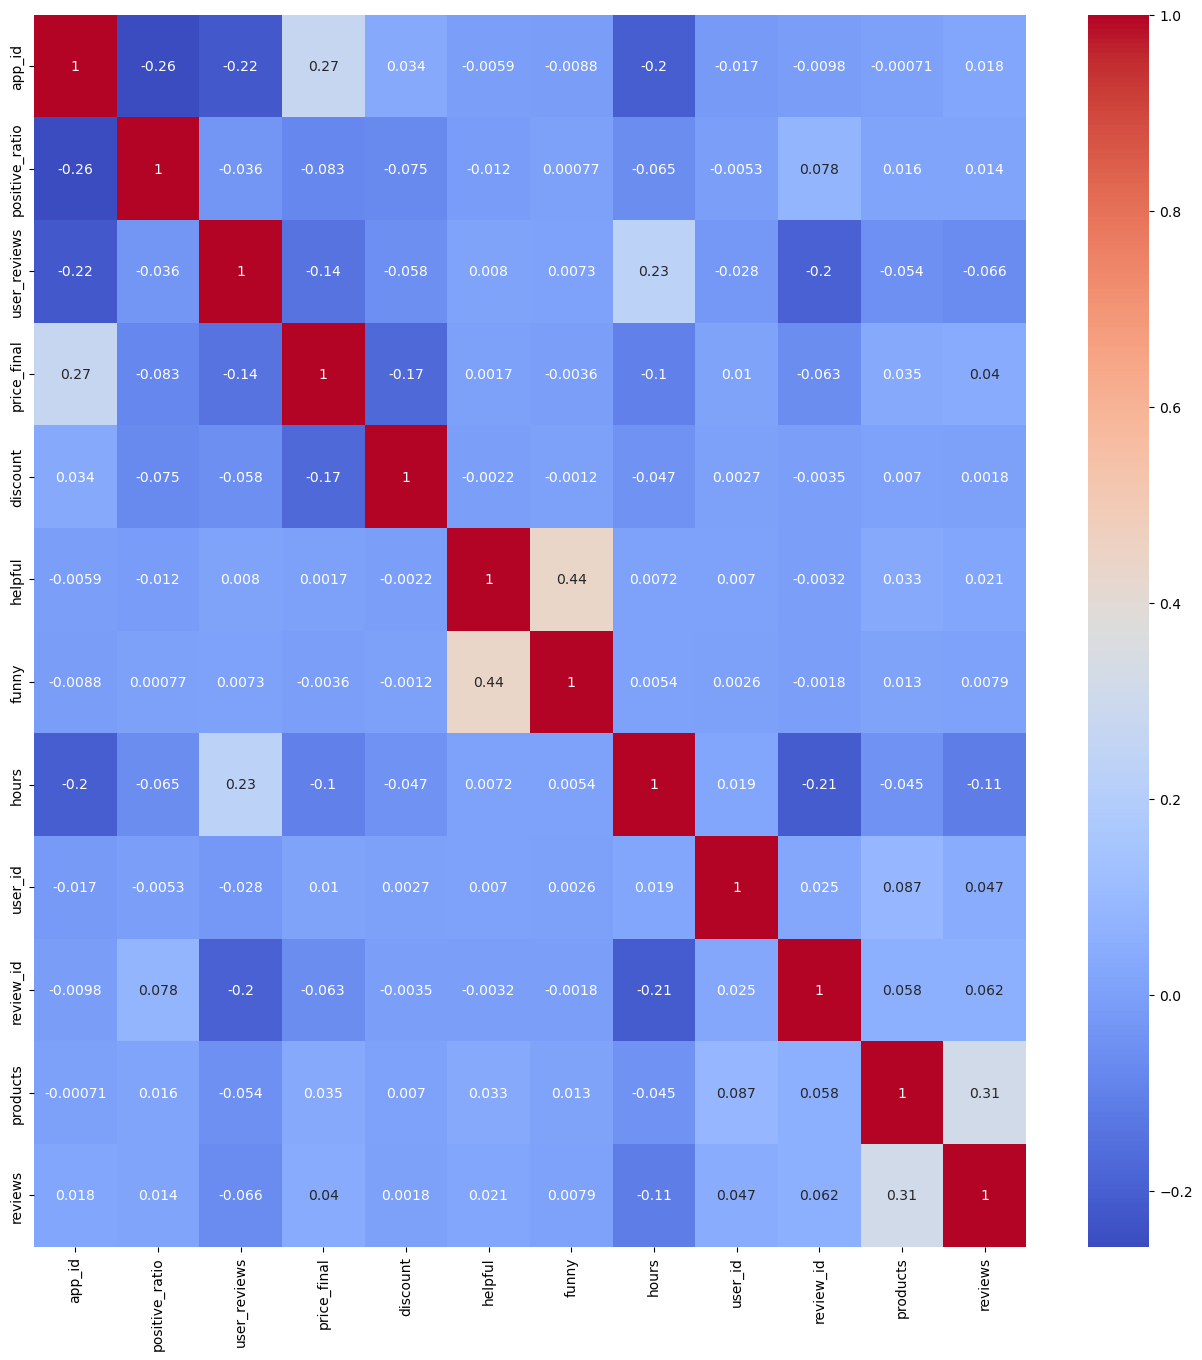

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select only numeric columns
numeric_cols = final_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Set the size of the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the correlation heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Show the plot
plt.show()


Checking info on the dataframe, we are now down to 34 rows and 2.1 GB.

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051221 entries, 0 to 9846637
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   app_id             int64  
 1   title              object 
 2   date_release       object 
 3   win                bool   
 4   mac                bool   
 5   linux              bool   
 6   rating             object 
 7   positive_ratio     int64  
 8   user_reviews       int64  
 9   price_final        float64
 10  discount           float64
 11  steam_deck         bool   
 12  helpful            int64  
 13  funny              int64  
 14  date               object 
 15  is_recommended     bool   
 16  hours              float64
 17  user_id            int64  
 18  review_id          int64  
 19  products           int64  
 20  reviews            int64  
 21  Short Description  object 
 22  Developer          object 
 23  Publisher          object 
 24  Genre              object 
 25  Tags              

We convert date columns to datetime64 dtype. We also rename 'date' to the more descriptive 'date_reviewed'

In [36]:
final_df['date_release'] = pd.to_datetime(final_df['date_release'])

In [37]:
final_df['date_reviewed'] = pd.to_datetime(final_df['date'])

We check dtypes to be sure the changes were made.

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051221 entries, 0 to 9846637
Data columns (total 35 columns):
 #   Column             Dtype         
---  ------             -----         
 0   app_id             int64         
 1   title              object        
 2   date_release       datetime64[ns]
 3   win                bool          
 4   mac                bool          
 5   linux              bool          
 6   rating             object        
 7   positive_ratio     int64         
 8   user_reviews       int64         
 9   price_final        float64       
 10  discount           float64       
 11  steam_deck         bool          
 12  helpful            int64         
 13  funny              int64         
 14  date               object        
 15  is_recommended     bool          
 16  hours              float64       
 17  user_id            int64         
 18  review_id          int64         
 19  products           int64         
 20  reviews            int64

We drop the 'date' column, which is now redundant.

In [39]:
final_df = final_df.drop(columns=['date'])

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051221 entries, 0 to 9846637
Data columns (total 34 columns):
 #   Column             Dtype         
---  ------             -----         
 0   app_id             int64         
 1   title              object        
 2   date_release       datetime64[ns]
 3   win                bool          
 4   mac                bool          
 5   linux              bool          
 6   rating             object        
 7   positive_ratio     int64         
 8   user_reviews       int64         
 9   price_final        float64       
 10  discount           float64       
 11  steam_deck         bool          
 12  helpful            int64         
 13  funny              int64         
 14  is_recommended     bool          
 15  hours              float64       
 16  user_id            int64         
 17  review_id          int64         
 18  products           int64         
 19  reviews            int64         
 20  Short Description  objec

We output the transposed head of final_df to visually inspect the entries in the columns.

In [41]:
final_df.head().T

,0,1,2,3,4
app_id,10090,10090,10090,10090,10090
title,Call of Duty: World at War,Call of Duty: World at War,Call of Duty: World at War,Call of Duty: World at War,Call of Duty: World at War
date_release,2008-11-18 00:00:00,2008-11-18 00:00:00,2008-11-18 00:00:00,2008-11-18 00:00:00,2008-11-18 00:00:00
win,True,True,True,True,True
mac,False,False,False,False,False
linux,False,False,False,False,False
rating,Very Positive,Very Positive,Very Positive,Very Positive,Very Positive
positive_ratio,92,92,92,92,92
user_reviews,37039,37039,37039,37039,37039
price_final,19.99,19.99,19.99,19.99,19.99


We check to see how many unique values there are in the object columns. Rating has 5 categories, type has 1, owners has 13, required age has 12 and platforms has 4. The rest have hundreds of categories.

In [42]:
# select object columns only
obj_cols = final_df.select_dtypes(include=['object'])

# get unique count for each column
for col in obj_cols:
    unique_count = obj_cols[col].nunique()
    print(f'{col}: {unique_count}')


title: 553
rating: 5
Short Description: 553
Developer: 463
Publisher: 344
Genre: 184
Tags: 553
Type: 1
Categories: 432
Owners: 13
Languages: 428
Platforms: 4
Required Age: 12
Website: 543
Header Image: 553


In [43]:
obj_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051221 entries, 0 to 9846637
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   title              object
 1   rating             object
 2   Short Description  object
 3   Developer          object
 4   Publisher          object
 5   Genre              object
 6   Tags               object
 7   Type               object
 8   Categories         object
 9   Owners             object
 10  Languages          object
 11  Platforms          object
 12  Required Age       object
 13  Website            object
 14  Header Image       object
dtypes: object(15)
memory usage: 1.1+ GB


We list the numeric columns.

In [44]:
num_cols = final_df.select_dtypes(include=['float64', 'int64'])
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051221 entries, 0 to 9846637
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   positive_ratio  int64  
 2   user_reviews    int64  
 3   price_final     float64
 4   discount        float64
 5   helpful         int64  
 6   funny           int64  
 7   hours           float64
 8   user_id         int64  
 9   review_id       int64  
 10  products        int64  
 11  reviews         int64  
dtypes: float64(3), int64(9)
memory usage: 897.7 MB


We check the unique categories for 'Platforms' and find it duplicates the binary columns 'win', 'mac' and 'linux'. so we drop the 'Platforms; column.

In [45]:
# get the count of each unique item in 'col1'
value_counts = final_df['Platforms'].value_counts()

print(value_counts)

windows                5605299
windows, mac, linux    2067412
windows, mac           1227646
windows, linux          150864
Name: Platforms, dtype: int64


In [46]:
final_df = final_df.drop(columns=['Platforms'])

We also drop the 'rating' column since it is derived from the 'positive_ratio' column.

In [47]:
final_df = final_df.drop(columns=['rating'])

Checking info on the columns in the final_df, we now have 32 columns and the dataframe is 1.9 GB.

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9051221 entries, 0 to 9846637
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   app_id             int64         
 1   title              object        
 2   date_release       datetime64[ns]
 3   win                bool          
 4   mac                bool          
 5   linux              bool          
 6   positive_ratio     int64         
 7   user_reviews       int64         
 8   price_final        float64       
 9   discount           float64       
 10  steam_deck         bool          
 11  helpful            int64         
 12  funny              int64         
 13  is_recommended     bool          
 14  hours              float64       
 15  user_id            int64         
 16  review_id          int64         
 17  products           int64         
 18  reviews            int64         
 19  Short Description  object        
 20  Developer          objec

It would be better to restrict the dataframe to the users with the largest number of rows in the existing 'final_df' since that would allow us to greate profiles of users with the maximum amount of detail. We create a sorted list of the users with the largest number of rows in the dataframe. We iteratively add those users untill the number of rows reaches 600,000.

In [49]:
# group the rows by user_id and count the number of rows in each group
count_per_user = final_df.groupby('user_id').size()

# get the user_ids with the most rows
user_ids = count_per_user.nlargest(50000, keep='last').index.tolist()

In [50]:
# create an empty list to store the filtered DataFrames
reduced_dfs = []

# set a variable to keep track of the total number of rows
total_rows = 0

# loop through the user_ids with the most rows, adding them to the filtered DataFrame
for user_id in user_ids:
    # filter the original DataFrame to include only the rows with the current user_id
    temp_df = final_df[final_df['user_id'] == user_id]
    
    # calculate the number of rows to add from the current user_id
    rows_to_add = min(temp_df.shape[0], 1000000 - total_rows)
    
    # add the selected rows to the filtered DataFrame list
    reduced_dfs.append(temp_df.iloc[:rows_to_add])
    
    # update the total number of rows
    total_rows += rows_to_add
    
    # stop the loop if the total number of rows is close enough to half a million
    if total_rows >= 600000:
        break

# concatenate the reduced DataFrames into a single DataFrame
reduced_df = pd.concat(reduced_dfs, ignore_index=True)

The final shape of the 'reduced_df' is 600,000 rows and 32 columns.

In [51]:
reduced_df.shape

(600001, 32)

We check the ratio of positive to negative recommendations by users.

In [52]:
reduced_df.groupby('is_recommended').count()

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,discount,...,Genre,Tags,Type,Categories,Owners,Languages,Required Age,Website,Header Image,date_reviewed
is_recommended,,,,,,,,,,,,,,,,,,,,,
False,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
True,480611,480611,480611,480611,480611,480611,480611,480611,480611,480611,...,480611,480611,480611,480611,480611,480611,480611,480611,480611,480611


We see 480611 positive and 119390 negative recommendations.

In [53]:
average_positive_ratio_games = games_df['positive_ratio'].mean()
print(average_positive_ratio_games)


76.75798819136928


The average positive ratio of all games in 'games_df' is 77%.

In [54]:
average_positive_ratio_details = 100*(details_df['Positive Reviews'] / 
                                  (details_df['Positive Reviews'] + details_df['Negative Reviews']))
print(average_positive_ratio_details.mean())

73.65355475592352


The average positive ratio of all reviews in 'details_df' is 74%.

In [55]:
average_positive_ratio_recs = reduced_df['is_recommended'].mean()
print(average_positive_ratio_recs)

0.8010169983050028


The average positive ratio of all recommendations in 'reduced_df' is 80%.

The ratio of positive recommendations in 'reduced_df' is close enough to the complete dataset is close enough to be considered representative.

The 'reduced_df' is now 126.5 MB. A much smaller size, but still representative of the user base.

In [56]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600001 entries, 0 to 600000
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   app_id             600001 non-null  int64         
 1   title              600001 non-null  object        
 2   date_release       600001 non-null  datetime64[ns]
 3   win                600001 non-null  bool          
 4   mac                600001 non-null  bool          
 5   linux              600001 non-null  bool          
 6   positive_ratio     600001 non-null  int64         
 7   user_reviews       600001 non-null  int64         
 8   price_final        600001 non-null  float64       
 9   discount           600001 non-null  float64       
 10  steam_deck         600001 non-null  bool          
 11  helpful            600001 non-null  int64         
 12  funny              600001 non-null  int64         
 13  is_recommended     600001 non-null  bool    

We save the reduced_df for use in other notebooks, since running the data processing notebook every time would be wasteful.

In [57]:
reduced_df.to_csv('data/reduced_dataframe.csv', index=False)

In [58]:
top_25_games = reduced_df.groupby('title').filter(lambda x: len(x) >= 1).groupby('title')['is_recommended'].mean().sort_values(ascending=False).head(25).reset_index().rename(columns={'title': 'game_name'})
print(top_25_games)

                                            game_name  is_recommended
0                                            Portal 2             1.0
1                                         Left 4 Dead             1.0
2                                            Deadside             1.0
3                                             Brotato             1.0
4        Atelier Meruru ~The Apprentice of Arland~ DX             1.0
5   Atelier Lydie & Suelle: The Alchemists and the...             1.0
6                                  Tabletop Simulator             1.0
7                                     Persona 5 Royal             1.0
8                           Assassin's Creed® Odyssey             1.0
9                                               OMORI             1.0
10                                        Neverwinter             1.0
11                           The Jackbox Party Pack 5             1.0
12                                   The Outer Worlds             1.0
13                  

we chech the mean number of usesr ratings per game. The idea is that we should only look at games that have many ratings, since the central limit theorum states that we need a large number of observations for the rating to be accurate. We we see the average number of user recommendations is 1087.

In [59]:
mean_is_recommended_per_game = reduced_df.groupby('title')['is_recommended'].count().mean()
print(mean_is_recommended_per_game)


1086.9583333333333


We rerun the code, but restricting the choice to games that recieved at least 1000 recommendation reviews. The balance returns to favor hardcore and AAA games.The individual games, however, change. We also see that the recommendation ratios are now no longer 1.0 in the top 25.

In [60]:
top_25_games = reduced_df.groupby('title').filter(lambda x: len(x) >= 1000).groupby('title')['is_recommended'].mean().sort_values(ascending=False).head(25).reset_index().rename(columns={'title': 'game_name'})
print(top_25_games)


                         game_name  is_recommended
0                         Terraria        0.992868
1               Fallout: New Vegas        0.989130
2                       The Forest        0.985276
3                    Left 4 Dead 2        0.981702
4                 Wallpaper Engine        0.973236
5                      Garry's Mod        0.969222
6      Sid Meier's Civilization® V        0.967684
7                     It Takes Two        0.963682
8                  Half-Life: Alyx        0.963314
9              PowerWash Simulator        0.962693
10                    Phasmophobia        0.960270
11   Ori and the Will of the Wisps        0.949178
12                           Stray        0.947822
13                   Papers Please        0.945793
14                         Celeste        0.944112
15               Blade and Sorcery        0.944068
16                 Resident Evil 2        0.942685
17   The Binding of Isaac: Rebirth        0.938063
18                  Slay the Sp

We also look at the average number of hours each game is played. We do this with the idea that an inderect measure of game preference may be more honest. ONce again, the type pf games remain the same, but the particular games change. Te games are moselty MMOs.

In [61]:
recommended_df = reduced_df[reduced_df['is_recommended'] == True]  # Select only the rows where is_recommended is True
hours_mean_by_game = recommended_df.groupby('title')['hours'].mean().sort_values(ascending=False)  # Group by title and calculate the mean of hours
print(hours_mean_by_game.head(25))  # Print the top 25 games by the mean of hours played by recommended users


title
MONOPOLY® PLUS                        957.500000
Counter-Strike: Global Offensive      367.561211
FINAL FANTASY XIV Online              347.207715
Dota 2                                337.192878
Team Fortress 2                       336.062249
Warframe                              322.834205
Hearts of Iron IV                     319.411377
Tom Clancy's Rainbow Six® Siege       313.943051
Stellaris                             307.430769
Europa Universalis IV                 295.859174
Garry's Mod                           290.950752
Grand Theft Auto V                    285.542974
Monster Hunter: World                 278.382189
ARK: Survival Evolved                 275.658430
Phantasy Star Online 2 New Genesis    272.670000
RimWorld                              271.158368
Left 4 Dead                           267.900000
Grim Dawn                             261.546429
Dead by Daylight                      256.115811
War Thunder                           254.831907
Destiny 2     

We also look at the total hours played per game. This shows games with the most replay value.

In [62]:
recommended_df = reduced_df[reduced_df['is_recommended'] == True]  # Select only the rows where is_recommended is True
hours_mean_by_game = recommended_df.groupby('title')['hours'].sum().sort_values(ascending=False)  # Group by title and calculate the mean of hours
print(hours_mean_by_game.head(25))  # Print the top 25 games by the mean of hours played by recommended users


title
Fallout 4                                        1452258.4
Grand Theft Auto V                               1392022.0
Arma 3                                           1249550.5
Hearts of Iron IV                                 988258.8
RimWorld                                          980237.5
Rust                                              980228.4
Red Dead Redemption 2                             909007.6
No Man's Sky                                      818188.2
Divinity: Original Sin 2 - Definitive Edition     742899.8
Warframe                                          728636.8
Counter-Strike: Global Offensive                  716376.8
FINAL FANTASY XIV Online                          715595.1
The Elder Scrolls® Online                         707713.1
Tom Clancy's Rainbow Six® Siege                   695697.8
The Witcher® 3: Wild Hunt                         695550.8
Path of Exile                                     670562.3
PAYDAY 2                                          

We normalize the average hours played per game. The idea is that not every game takes the same amount of time to complete, comparing the raw time played would favor long playing games. The results were that the ordering and selection of games changes, but the makeup stays the same.

In [63]:
recommended_df = reduced_df[reduced_df['is_recommended'] == True] 
# Select only the rows where is_recommended is True

hours_mean_by_game = recommended_df.groupby('title')['hours'].mean()  
# Group by title and calculate the mean of hours

normalized_hours_by_game = hours_mean_by_game / hours_mean_by_game.mean() 
# Divide each mean by the overall mean of hours played

normalized_hours_by_game = normalized_hours_by_game.sort_values(ascending=False) 
# Sort in descending order of normalized mean hours played

print(normalized_hours_by_game.head(25))  
# Print the top 25 games by normalized mean hours played


title
MONOPOLY® PLUS                        12.369144
Counter-Strike: Global Offensive       4.748217
FINAL FANTASY XIV Online               4.485287
Dota 2                                 4.355914
Team Fortress 2                        4.341308
Warframe                               4.170426
Hearts of Iron IV                      4.126209
Tom Clancy's Rainbow Six® Siege        4.055569
Stellaris                              3.971442
Europa Universalis IV                  3.821958
Garry's Mod                            3.758550
Grand Theft Auto V                     3.688692
Monster Hunter: World                  3.596187
ARK: Survival Evolved                  3.561001
Phantasy Star Online 2 New Genesis     3.522396
RimWorld                               3.502869
Left 4 Dead                            3.460777
Grim Dawn                              3.378700
Dead by Daylight                       3.308547
War Thunder                            3.291961
Destiny 2                         

## Would it be better to count the number of users that played more that average?

## I should vecotize before I join the dataframes, since the individual dataframes are much smaller than the merged dataframe.